In [1]:
import pandas as pd
import numpy as np
import codecs
import chardet
companies = pd.read_csv("companies.csv",sep='\t')
companies.head(10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [2]:
rounds2 = pd.read_csv("rounds2.csv",encoding='ISO-8859-1')
rounds2.head(10)
rounds2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [3]:
#How many unique companies are present in rounds2?
len(rounds2.company_permalink.str.lower().unique())

66370

In [4]:
#How many unique companies are present in companies?
len(companies.permalink.str.lower().unique())

66368

In [5]:
#In the companies data frame, which column can be used as the unique key for each company?
100*(len(companies.name.str.lower().unique())/len(companies.name.str.lower()))

99.50277242044359

In [6]:
100*(len(companies.permalink.str.lower().unique())/len(companies.permalink.str.lower()))
#As the ratio is 100% , permalink can be used as unique id

100.0

In [7]:
(rounds2.company_permalink.str.lower().unique() not in companies.permalink.str.lower().unique())


/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


True

In [8]:
#Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
rounds2['company_permalink'].str.lower().isin(companies['permalink'].str.lower()).value_counts()

True     114875
False        74
Name: company_permalink, dtype: int64

#Hence there are companies in rounds2 that are not in companies

In [9]:
#Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?
companies['permalink_lower'] = companies['permalink'].str.lower()
rounds2['company_permalink_lower'] = rounds2['company_permalink'].str.lower()
master_frame = pd.merge(companies, rounds2, how = "inner", left_on = "permalink_lower", right_on = "company_permalink_lower")
master_frame.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,permalink_lower,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_lower
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com


In [10]:
#drop redundant,unnecessary columns
master_frame.drop(columns=['permalink_lower','company_permalink_lower','company_permalink'])



,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [11]:
master_frame.info()
master_frame['funding_round_type'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114875 entries, 0 to 114874
Data columns (total 18 columns):
permalink                  114875 non-null object
name                       114874 non-null object
homepage_url               108749 non-null object
category_list              111488 non-null object
status                     114875 non-null object
country_code               106238 non-null object
state_code                 103972 non-null object
region                     104749 non-null object
city                       104752 non-null object
founded_at                 94387 non-null object
permalink_lower            114875 non-null object
company_permalink          114875 non-null object
funding_round_permalink    114875 non-null object
funding_round_type         114875 non-null object
funding_round_code         31132 non-null object
funded_at                  114875 non-null object
raised_amount_usd          94915 non-null float64
company_permalink_lower    114875 non-nul

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [12]:
master_frame.isnull().sum()
#fill country_code , funding_round_code , raised_amount_usd
master_frame['raised_amount_usd'].describe()

count    9.491500e+04
mean     1.043057e+07
std      1.148477e+08
min      0.000000e+00
25%      3.241400e+05
50%      1.686193e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [13]:
#Imputing data - filling NaN values of raised_amount_usd to mean
master_frame['raised_amount_usd'].fillna((master_frame['raised_amount_usd'].mean()), inplace=True)

In [14]:
#fill country_code NaN with most used country_code
master_frame['country_code'].unique()

array(['IND', 'USA', nan, 'CHN', 'HKG', 'CAN', 'CHL', 'GBR', 'FRA', 'AUS',
       'DNK', 'ROM', 'AUT', 'KOR', 'NLD', 'SWE', 'JPN', 'RUS', 'SGP',
       'NOR', 'COL', 'ESP', 'BEL', 'IRL', 'ITA', 'ISR', 'NZL', 'CZE',
       'DEU', 'CHE', 'BRA', 'BGR', 'SVN', 'JOR', 'HUN', 'BWA', 'NGA',
       'FIN', 'TUR', 'IDN', 'ARE', 'CYP', 'POL', 'CRI', 'PRT', 'ARG',
       'TWN', 'KHM', 'THA', 'SVK', 'UKR', 'LTU', 'ISL', 'ZAF', 'MEX',
       'VEN', 'URY', 'MUS', 'KEN', 'PHL', 'MNE', 'VNM', 'GHA', 'PSE',
       'MYS', 'PER', 'EGY', 'PAN', 'LVA', 'GGY', 'ALB', 'UGA', 'HRV',
       'EST', 'LBN', 'GRC', 'PAK', 'NPL', 'LUX', 'SAU', 'IRN', 'GTM',
       'BAH', 'ARM', 'BGD', 'MDA', 'SRB', 'TUN', 'ZWE', 'BRB', 'NIC',
       'TAN', 'PRI', 'TTO', 'BHR', 'CMR', 'BLR', 'CYM', 'BRN', 'ECU',
       'SLV', 'MLT', 'ZMB', 'MKD', 'GIB', 'TGO', 'LAO', 'BMU', 'HND',
       'MCO', 'MMR', 'KAZ', 'QAT', 'DOM', 'MAR', 'LIE', 'GEO', 'MOZ',
       'DZA', 'JAM', 'KNA', 'AZE', 'SEN', 'RWA', 'DMA', 'UZB', 'BLZ',
       'OMN', '

In [15]:
#finding the percentage of records with funding_round_type as undisclosed 
100*(master_frame['funding_round_type'].value_counts()['undisclosed']/master_frame.count()['funding_round_type'])


4.2585418933623505

#As the undisclosed records are only 4%, ignoring the same

In [16]:
pd.options.display.float_format = '{:20,.2f}'.format
#2.1.1 Average funding amount of venture type
venture_df = master_frame[master_frame['funding_round_type'].str.lower()=='venture']
venture_df['raised_amount_usd'].mean()

11624410.832972398

In [17]:
#2.1.2 Average funding amount of angel type
angel_df = master_frame[master_frame['funding_round_type'].str.lower() == 'angel']
angel_df['raised_amount_usd'].mean()

2874687.7399733467

In [18]:
#2.1.3 Average funding amount of seed type
seed_df = master_frame[master_frame['funding_round_type'].str.lower() == 'seed']
seed_df['raised_amount_usd'].mean()

2919613.091942578

In [19]:
#2.1.4 Average funding amount of private_equity type
private_equity_df = master_frame[master_frame['funding_round_type'].str.lower() == 'private_equity']
private_equity_df['raised_amount_usd'].mean()

63728545.97228253

In [20]:
#2.1.5 Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?
amount_5_15 = master_frame[(master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000)]
amount_5_15.groupby('funding_round_type').size().sort_values(ascending=False).index.values[0]

'venture'

In [21]:
venture_df.country_code.value_counts()

USA    38372
GBR     2303
CHN     2087
CAN     1346
IND      992
FRA      983
ISR      910
DEU      785
ESP      343
JPN      318
SWE      313
CHE      294
SGP      288
IRL      273
NLD      245
BRA      239
RUS      224
AUS      224
KOR      222
FIN      171
BEL      148
DNK      136
ITA      134
TUR      113
NOR       98
HKG       94
ARG       69
AUT       64
IDN       52
NZL       50
       ...  
HRV        2
LIE        2
KAZ        2
BWA        2
MAF        2
PRI        2
MUS        2
RWA        2
ARM        2
ECU        2
GTM        1
MAR        1
KNA        1
MNE        1
GGY        1
SAU        1
MMR        1
KWT        1
MCO        1
BHR        1
LAO        1
TUN        1
PSE        1
UGA        1
MKD        1
PAN        1
BAH        1
MOZ        1
SEN        1
CRI        1
Name: country_code, Length: 103, dtype: int64

In [22]:
#filling NaN of country_code column with highest occuring country i.e USA
venture_df['country_code'].fillna((venture_df.country_code.value_counts().sort_values(ascending=False).index.values[0]), inplace=True)


/Users/rv/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
venture_df.country_code.value_counts()

USA    41238
GBR     2303
CHN     2087
CAN     1346
IND      992
FRA      983
ISR      910
DEU      785
ESP      343
JPN      318
SWE      313
CHE      294
SGP      288
IRL      273
NLD      245
BRA      239
RUS      224
AUS      224
KOR      222
FIN      171
BEL      148
DNK      136
ITA      134
TUR      113
NOR       98
HKG       94
ARG       69
AUT       64
IDN       52
NZL       50
       ...  
HRV        2
LIE        2
KAZ        2
BWA        2
MAF        2
PRI        2
MUS        2
RWA        2
ARM        2
ECU        2
GTM        1
MAR        1
KNA        1
MNE        1
GGY        1
SAU        1
MMR        1
KWT        1
MCO        1
BHR        1
LAO        1
TUN        1
PSE        1
UGA        1
MKD        1
PAN        1
BAH        1
MOZ        1
SEN        1
CRI        1
Name: country_code, Length: 103, dtype: int64

In [24]:
#For the chosen investment type, make a data frame named top9 with the top nine countries 
array_top9 = venture_df.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False).index.values[0:9][0:9]
array_top9


array(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'DEU', 'ISR', 'FRA', 'JPN'],
      dtype=object)

In [154]:
#For the chosen investment type, make a data frame named top9 with the top nine countries 
array_top3 = venture_df.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False).index.values[0:3][0:3]
array_top3
top3 = venture_df[venture_df['country_code'].isin(array_top3) ]

In [25]:
top9 = venture_df[venture_df['country_code'].isin(array_top9) ]

In [26]:
#To cross check if all rows with USA as country_code is included or not
top9.groupby('country_code').size().sort_values(ascending=False)

country_code
USA    41238
GBR     2303
CHN     2087
CAN     1346
IND      992
FRA      983
ISR      910
DEU      785
JPN      318
dtype: int64

In [27]:
top9.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False)
#NOTE : Scraping external websites for Language-Country mapping is pending.

country_code
USA     479,098,615,468.39
CHN      45,290,609,286.24
GBR      22,832,409,915.59
IND      16,144,195,249.98
CAN      10,522,084,030.56
DEU       8,723,730,829.69
ISR       8,096,600,082.84
FRA       7,950,421,412.47
JPN       3,822,621,893.18
Name: raised_amount_usd, dtype: float64

In [28]:
#3.1.1   Top English-speaking country
top9.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False).index.values[0]

'USA'

In [29]:
#3.1.2  Second English-speaking country
top9.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False).index.values[2]

'GBR'

In [30]:
#3.1.3  Second English-speaking country
top9.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False).index.values[3]

'IND'

In [38]:
#add primary_sector column in top9
top9['primary_sector'] = top9['category_list'].str.split('|').str[0].str.strip()
most_used_sector = top9.groupby('primary_sector').size().sort_values(ascending=False).index.values[0]
#fill NaN with most_used_sector
top9['primary_sector'].fillna(most_used_sector,inplace=True)
top9.head()

/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,permalink_lower,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_lower,primary_sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,Media
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,"10,430,574.60",/organization/-qounter,Application Platforms
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,Apps
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com,Curated Web
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,"10,430,574.60",/organization/004-technologies,Software


In [41]:
mapping = pd.read_csv("mapping.csv",encoding='ISO-8859-1')
#using melt to map category_list to sector
mapping_melted = pd.melt(mapping, id_vars=['category_list'], value_vars=mapping.columns[1:],var_name='main_sector')
mapping_melted = mapping_melted[mapping_melted.value == 1].drop('value', axis=1)
mapping_melted.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [43]:
#Checkpoint 4 : code for Merging top9 and mapping_melted
top9_merged = pd.merge(top9, mapping_melted, left_on='primary_sector', right_on='category_list').drop('category_list_y', axis=1)

top9_merged.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,permalink_lower,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_lower,primary_sector,main_sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,Media,Entertainment
1,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,"15,000,000.00",/organization/90min,Media,Entertainment
2,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,"5,800,000.00",/organization/90min,Media,Entertainment
3,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,"18,000,000.00",/organization/90min,Media,Entertainment
4,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,"5,000,000.00",/organization/all-def-digital,Media,Entertainment


In [65]:
#Checkpoint 5 - country USA
D1 = top9_merged[(top9_merged['country_code'] == 'USA') & (top9_merged['raised_amount_usd'] > 5000000) & (top9_merged['raised_amount_usd'] < 15000000)]
D1_by_sector = D1.groupby('main_sector')
D1['sector_wise_investment_count'] = D1.groupby('main_sector')['permalink'].transform("count")
D1['sector_wise_amount'] = D1.groupby('main_sector')["raised_amount_usd"].transform('sum')


D1.head()

/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_lower,primary_sector,main_sector,sector_wise_investment_count,sector_wise_amount
28,/Organization/Matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,...,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,"10,000,000.00",/organization/matchmine,Media,Entertainment,708,"6,474,423,371.83"
33,/Organization/Newscorporation,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,...,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,"12,500,000.00",/organization/newscorporation,Media,Entertainment,708,"6,474,423,371.83"
34,/Organization/Nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,...,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,"9,400,000.00",/organization/nokeena,Media,Entertainment,708,"6,474,423,371.83"
36,/Organization/Nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,...,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,"6,500,000.00",/organization/nokeena,Media,Entertainment,708,"6,474,423,371.83"
37,/Organization/Otter-Media,Otter Media,NaN,Media|Venture Capital|Video,operating,USA,NaN,NaN,NaN,NaN,...,/funding-round/8f0d1129cb5436a5e92d06a2f564a012,venture,NaN,22-04-2014,"10,430,574.60",/organization/otter-media,Media,Entertainment,708,"6,474,423,371.83"


In [92]:
#Total no.of investments = row count
D1.shape[0]
#Total amount of investments
D1.raised_amount_usd.sum()

D1_shrinked = D1[['main_sector','sector_wise_investment_count']]
D1_shrinked = D1_shrinked.drop_duplicates()
D1_shrinked = D1_shrinked.sort_values(by='sector_wise_investment_count', ascending=False)
#For Table 5.1
D1_shrinked.nlargest(5,['sector_wise_investment_count'])

,main_sector,sector_wise_investment_count
2042,Others,3071
6239,Cleantech / Semiconductors,2929
19464,"Social, Finance, Analytics, Advertising",2081
59,"News, Search and Messaging",1687
14452,Health,962


In [95]:
D1['company_wise_amount'] = D1.groupby('permalink')["raised_amount_usd"].transform('sum')
D1.sort_values(by='company_wise_amount', ascending=False)
D1_company_wise = D1[['permalink','name','company_wise_amount']]
D1_company_wise = D1_company_wise.drop_duplicates()
D1_company_wise = D1_company_wise.sort_values(by='company_wise_amount', ascending=False)
D1_company_wise.nlargest(5,['company_wise_amount'])



/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,permalink,name,company_wise_amount
35140,/Organization/Quellan,Quellan,"147,597,469.74"
47474,/Organization/Lithiumtechnologies,Lithium Technologies,"104,444,596.76"
9439,/Organization/Geto2,GetO2,"93,875,171.36"
39712,/Organization/Starboard-Resources,Starboard Resources,"83,444,596.76"
40269,/Organization/Verdex-Technologies,Verdex Construction,"83,444,596.76"


In [67]:
#Checkpoint 5 - country GBR
D2 = top9_merged[(top9_merged['country_code'] == 'GBR') & (top9_merged['raised_amount_usd'] > 5000000) & (top9_merged['raised_amount_usd'] < 15000000)]
D2_by_sector = D2.groupby('main_sector')
D2['sector_wise_investment_count'] = D2.groupby('main_sector')['permalink'].transform("count")
D2['sector_wise_amount'] = D2.groupby('main_sector')["raised_amount_usd"].transform('sum')


D2.head()

/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_lower,primary_sector,main_sector,sector_wise_investment_count,sector_wise_amount
2,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,"5,800,000.00",/organization/90min,Media,Entertainment,70,"651,844,849.28"
78,/Organization/Common-Interest-Communities,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,...,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,"10,000,000.00",/organization/common-interest-communities,Application Platforms,"News, Search and Messaging",89,"816,080,025.28"
89,/Organization/Geospock-Ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,...,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,"5,460,000.00",/organization/geospock-ltd-,Application Platforms,"News, Search and Messaging",89,"816,080,025.28"
90,/Organization/Geospock-Ltd-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,...,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,"5,400,000.00",/organization/geospock-ltd-,Application Platforms,"News, Search and Messaging",89,"816,080,025.28"
100,/Organization/Lemonade-3,Takumi,http://www.takumi.com,Application Platforms|Brand Marketing|Developm...,operating,GBR,H9,London,London,01-06-2015,...,/funding-round/26957c2e597d4617cbdf2c185a4bd135,venture,NaN,01-04-2015,"10,430,574.60",/organization/lemonade-3,Application Platforms,"News, Search and Messaging",89,"816,080,025.28"


In [98]:
#Total no.of investments = row count
D2.shape[0]
#Total amount of investments
D2.raised_amount_usd.sum()

D2_shrinked = D2[['main_sector','sector_wise_investment_count']]
D2_shrinked = D2_shrinked.drop_duplicates()
D2_shrinked = D2_shrinked.sort_values(by='sector_wise_investment_count', ascending=False)
#For Table 5.1
D2_shrinked.nlargest(5,['sector_wise_investment_count'])

,main_sector,sector_wise_investment_count
2159,Others,190
6277,Cleantech / Semiconductors,176
19513,"Social, Finance, Analytics, Advertising",130
78,"News, Search and Messaging",89
2,Entertainment,70


In [99]:
D2['company_wise_amount'] = D2.groupby('permalink')["raised_amount_usd"].transform('sum')
D2.sort_values(by='company_wise_amount', ascending=False)
D2_company_wise = D2[['permalink','name','company_wise_amount']]
D2_company_wise = D2_company_wise.drop_duplicates()
D2_company_wise = D2_company_wise.sort_values(by='company_wise_amount', ascending=False)
D2_company_wise.nlargest(5,['company_wise_amount'])



/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,permalink,name,company_wise_amount
1398,/Organization/Mysupermarket,mySupermarket,"65,122,298.38"
22228,/Organization/Cambridge-Cmos-Sensors,Cambridge CMOS Sensors,"41,722,298.38"
18039,/Organization/Datanomic,Datanomic,"37,591,723.79"
24818,/Organization/Greenroad-Technologies,GreenRoad Technologies,"37,500,000.00"
19878,/Organization/Celltick-Technologies,Celltick Technologies,"37,500,000.00"


In [68]:
#Checkpoint 6 - country IND
D3 = top9_merged[(top9_merged['country_code'] == 'IND') & (top9_merged['raised_amount_usd'] > 5000000) & (top9_merged['raised_amount_usd'] < 15000000)]
D3_by_sector = D3.groupby('main_sector')
D3['sector_wise_investment_count'] = D3.groupby('main_sector')['permalink'].transform("count")
D3['sector_wise_amount'] = D3.groupby('main_sector')["raised_amount_usd"].transform('sum')


D3.head()

/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_lower,primary_sector,main_sector,sector_wise_investment_count,sector_wise_amount
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,Media,Entertainment,36,"336,427,469.74"
199,/Organization/Birds-Eye-Systems,Birds Eye Systems,http://birdseyetech.com,Apps|Mobile|Transportation,operating,IND,16,Mumbai,Mumbai,01-01-2010,...,/funding-round/efd4b1671334857feb157972242abf2d,venture,B,30-09-2014,"10,430,574.60",/organization/birds-eye-systems,Apps,"News, Search and Messaging",65,"619,168,335.28"
206,/Organization/Bobble-App,Bobble App,http://www.bobbleapp.me/,Apps|Mobile|Personalization|Software,operating,IND,7,New Delhi,New Delhi,NaN,...,/funding-round/9697feaa99067a22cd3ae09195001343,venture,A,05-11-2015,"10,430,574.60",/organization/bobble-app,Apps,"News, Search and Messaging",65,"619,168,335.28"
226,/Organization/Chillr-2,Chillr,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013,...,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,A,02-10-2015,"6,000,000.00",/organization/chillr-2,Apps,"News, Search and Messaging",65,"619,168,335.28"
345,/Organization/Innoz,Innoz,http://innoz.in,Apps|Mobile|Search,operating,IND,19,Bangalore,Bangalore,15-09-2008,...,/funding-round/e1cd0071f8313683acde18c88fe1beff,venture,A,01-04-2012,"10,430,574.60",/organization/innoz,Apps,"News, Search and Messaging",65,"619,168,335.28"


In [103]:
#Total no.of investments = row count
D3.shape[0]
#Total amount of investments
D3.raised_amount_usd.sum()

D3_shrinked = D3[['main_sector','sector_wise_investment_count']]
D3_shrinked = D3_shrinked.drop_duplicates()
D3_shrinked = D3_shrinked.sort_values(by='sector_wise_investment_count', ascending=False)
#For Table 5.1
D3_shrinked.nlargest(5,['sector_wise_investment_count'])

,main_sector,sector_wise_investment_count
2253,Others,125
199,"News, Search and Messaging",65
19655,"Social, Finance, Analytics, Advertising",52
0,Entertainment,36
14450,Health,31


In [125]:
D3['company_wise_amount'] = D3.groupby('permalink')["raised_amount_usd"].transform('sum')
D3.sort_values(by='company_wise_amount', ascending=False)
D3_company_wise = D3[['permalink','name','company_wise_amount']]
D3_company_wise = D3_company_wise.drop_duplicates()
D3_company_wise = D3_company_wise.sort_values(by='company_wise_amount', ascending=False)
D3_company_wise.nlargest(5,['company_wise_amount'])



/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,permalink,name,company_wise_amount
24979,/Organization/Azure-Power,Azure Power,"53,061,149.19"
33380,/Organization/Gupshup-Technology-India-Pvt-Ltd,GupShup,"33,000,000.00"
23783,/Organization/Myntra,Myntra,"33,000,000.00"
24173,/Organization/Snapdeal,Snapdeal,"32,861,149.19"
14234,/Organization/Maharana-Infrastructure-And-Prof...,Maharana Infrastructure and Professional Servi...,"32,030,574.60"


In [107]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,permalink_lower,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_lower
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,"10,430,574.60",/organization/-qounter
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/organization/-qounter
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com


In [139]:
#Checkpoint 6 : Plots

master_frame['raised_amount_usd'].sum()
#filter master_frame to contain only venture, seed, and private equity
master_frame_filtered = master_frame[master_frame.funding_round_type.str.lower().isin(['venture','seed','private_equity'])]
master_frame_filtered['mean_by_ft'] = master_frame_filtered.groupby('funding_round_type')["raised_amount_usd"].transform('mean')
master_frame_filtered['sum_by_ft'] = master_frame_filtered.groupby('funding_round_type')["raised_amount_usd"].transform('sum')

master_frame_filtered['total_amount_of_3fts'] = master_frame_filtered.sum_by_ft.sum()
master_frame_filtered['fraction_total_and_avg'] = master_frame_filtered['total_amount_of_3fts']/master_frame_filtered['mean_by_ft']
master_frame_filtered = master_frame_filtered[['funding_round_type','mean_by_ft','sum_by_ft','total_amount_of_3fts','fraction_total_and_avg']]
master_frame_filtered = master_frame_filtered.drop_duplicates()
master_frame_filtered.sort_values(by='mean_by_ft', ascending=False)
master_frame_filtered.head()

/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

,funding_round_type,mean_by_ft,sum_by_ft,total_amount_of_3fts,fraction_total_and_avg
0,venture,"11,624,410.83","644,899,064,191.64","38,824,527,632,622,296.00","3,339,913,582.76"
2,seed,"2,919,613.09","89,021,922,786.42","38,824,527,632,622,296.00","13,297,833,106.64"
21,private_equity,"63,728,545.97","145,555,999,000.69","38,824,527,632,622,296.00","609,217,220.33"


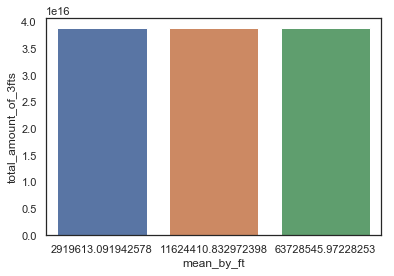

In [147]:
#Checkpoint 6 . 1
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
plt.plot(master_frame_filtered['mean_by_ft'],master_frame_filtered['total_amount_of_3fts'])
sns.barplot(x='mean_by_ft', y='total_amount_of_3fts', data=master_frame_filtered)

In [151]:
top9.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,permalink_lower,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_lower,primary_sector,sum_by_ft
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,Media,"602,481,288,168.92"
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,"10,430,574.60",/organization/-qounter,Application Platforms,"602,481,288,168.92"
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,Apps,"602,481,288,168.92"
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com,Curated Web,"602,481,288,168.92"
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,"10,430,574.60",/organization/004-technologies,Software,"602,481,288,168.92"


/Users/rv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


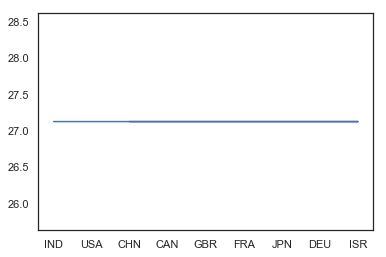

In [150]:
#Checkpoint 6 . 2 A plot showing the top 9 countries against the total amount of 
#investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
top9['sum_by_ft'] = top9.groupby('funding_round_type')["raised_amount_usd"].transform('sum')
top9.head()
#sns.barplot(x='country_code', y='sum_by_ft', data=top9)
plt.plot(top9['country_code'],np.log(top9['sum_by_ft']))



In [155]:

#Checkpoint 6 . A plot showing the number of investments in the top 3 sectors of the 
#top 3 countries on one chart (for the chosen investment type FT). 
top3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,permalink_lower,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_lower
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,"10,430,574.60",/organization/-qounter
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,USA,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,"10,430,574.60",/organization/004-technologies
10,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,"20,000,000.00",/organization/0xdata
